In [82]:
import numpy as np
from utils import load_from_pickle
import matplotlib.pyplot as plt
from classes.Robot import Robot
import numpy as np

In [83]:
np.set_printoptions(precision=3, suppress=True)

In [84]:
robot = Robot()

Device name: /dev/ttyUSB0
Port #: /dev/ttyUSB0
Port open OK; baudrate set.


In [85]:
data = load_from_pickle("robot_data.pkl")

Data loaded from robot_data.pkl


In [86]:
timestamps_s = np.array(data["timestamps_s"], dtype=np.float64)  # (N,)
waypoints_s = np.array(data["waypoints_s"], dtype=np.float64)  # (N,)
joint_readings = np.array(data["joint_deg"], dtype=np.float64)  # (N, 3, 4)
waypoints_taskspace = np.array(data["waypoints_taskspace"], dtype=np.float64)  # (M, 4)
waypoints_jointspace = np.array(data["waypoints_jointspace"], dtype=np.float64)  # (M, 4)
waypoints_taskspace_calc = np.array(
    data["waypoints_taskspace_calc"], dtype=np.float64
)  # (M, 4)
print(joint_readings).__repr__()


[[[-75.938 -39.375   6.328  93.34 ]
  [ -2.748  -1.374   0.      2.748]
  [  0.    -29.59  -72.63    0.   ]]

 [[-75.938 -39.375   6.328  93.34 ]
  [  0.      0.      0.      0.   ]
  [  0.    -72.63  -75.32    0.   ]]

 [[-75.674 -39.375   6.328  93.428]
  [  1.374   0.      0.      0.   ]
  [  0.    -56.49  -75.32    0.   ]]

 ...

 [[-75.41  -38.936   6.328  92.988]
  [ -2.748  -5.496   1.374   5.496]
  [  8.07  -78.01  -37.66  -18.83 ]]

 [[-75.762 -39.111   6.328  93.252]
  [ -5.496  -4.122   0.      4.122]
  [  0.    -78.01  -91.46  -10.76 ]]

 [[-75.85  -39.375   6.416  93.34 ]
  [ -2.748  -4.122   1.374   2.748]
  [  0.    -53.8   -78.01   -2.69 ]]]


'None'

In [87]:
joint_deg = [] 
for i in range(len(joint_readings)):
    joint_deg.append(joint_readings[i][0, :])

joint_deg = np.array(joint_deg, dtype=np.float64)

xyz_mm       = []
for i in range(len(joint_deg)):
    xyz_mm.append(robot.get_ee_pos(joint_deg[i]))
xyz_mm = np.array(xyz_mm, dtype=np.float64)


print(joint_deg).__repr__()

[[-75.938 -39.375   6.328  93.34 ]
 [-75.938 -39.375   6.328  93.34 ]
 [-75.674 -39.375   6.328  93.428]
 [-75.762 -39.463   6.328  93.428]
 [-75.498 -39.463   6.328  93.428]
 [-75.059 -39.463   6.328  93.34 ]
 [-74.355 -39.463   6.328  93.164]
 [-73.916 -39.375   6.328  92.988]
 [-73.213 -39.375   6.328  92.725]
 [-72.246 -39.287   6.152  92.373]
 [-71.191 -39.199   5.889  92.021]
 [-70.137 -39.111   5.537  91.582]
 [-68.994 -38.936   5.186  91.055]
 [-67.5   -38.76    4.746  90.527]
 [-66.006 -38.584   4.307  90.   ]
 [-64.424 -38.32    3.779  89.385]
 [-62.754 -38.057   3.252  88.682]
 [-60.82  -37.881   2.637  87.891]
 [-58.887 -37.617   2.021  87.188]
 [-56.777 -37.354   1.406  86.309]
 [-54.58  -37.002   0.791  85.342]
 [-52.295 -36.738   0.088  84.463]
 [-49.922 -36.299  -0.703  83.496]
 [-47.373 -35.947  -1.406  82.529]
 [-44.912 -35.596  -2.197  81.475]
 [-42.451 -35.244  -3.076  80.508]
 [-39.902 -34.98   -3.779  79.453]
 [-37.354 -34.629  -4.57   78.486]
 [-34.893 -34.277  -

'None'

In [88]:
target_deg = joint_deg[0]
print(target_deg).__repr__()
print(robot.get_fk(target_deg).__repr__())
print(robot.get_ee_pos(target_deg).__repr__())

[-75.938 -39.375   6.328  93.34 ]
array([[  -0.707,    0.486,    0.514, -206.653],
       [   0.423,   -0.291,    0.858,  123.671],
       [   0.567,    0.824,    0.   ,  282.667],
       [   0.   ,    0.   ,    0.   ,    1.   ]])
array([  25.241, -100.767,  149.17 ,  -60.293,  -75.938])


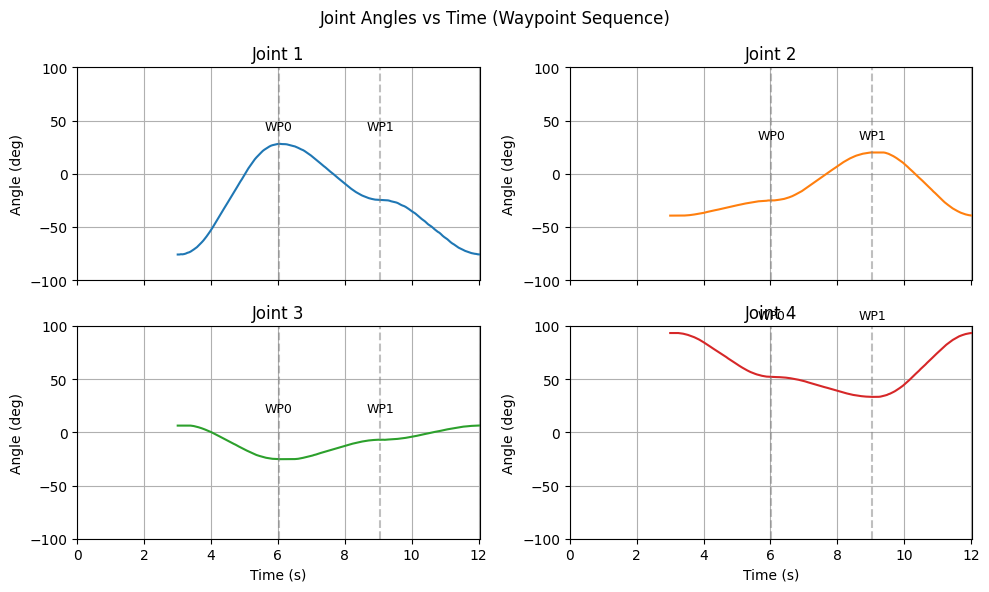

In [89]:
# --- Plot 1: Joint angles vs. time ---
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
titles = ["Joint 1", "Joint 2", "Joint 3", "Joint 4"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

for idx, ax in enumerate(axes.ravel()):
  ax.plot(timestamps_s, joint_deg[:, idx], label=titles[idx], color=colors[idx])
  ax.set_xlim(0, timestamps_s.max())
  ax.set_ylim(-100, 100)
  ax.set_title(titles[idx])
  ax.set_ylabel("Angle (deg)")
  ax.grid(True)

  # Mark waypoints on time axis
  for i, t in enumerate(waypoints_s):
    ax.axvline(x=t, color="gray", linestyle="--", alpha=0.5)
    # Use the max value of the current joint for annotation positioning
    y_pos = joint_deg[:, idx].max()
    ax.annotate(
        f"WP{i}",
        (t, y_pos),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=9,
    )

axes[1, 0].set_xlabel("Time (s)")
axes[1, 1].set_xlabel("Time (s)")
fig.suptitle("Joint Angles vs Time (Waypoint Sequence)")
plt.tight_layout()
plt.show()
plt.close(fig)

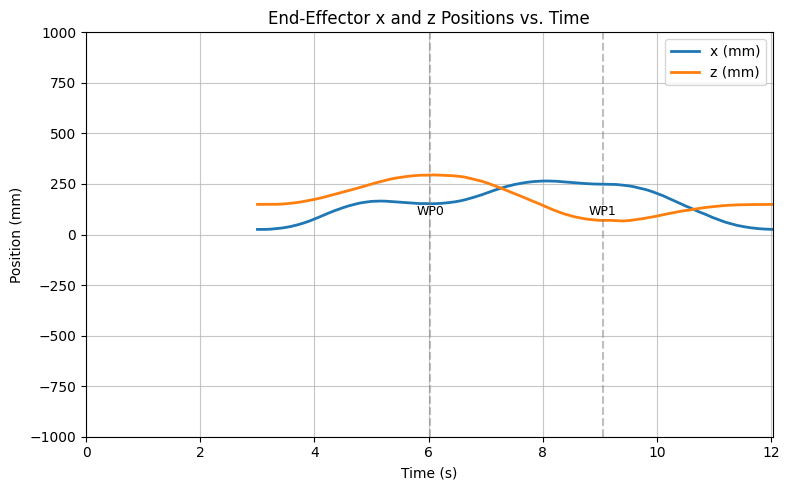

In [90]:
# --- Plot 2: x and z vs. time ---
plt.figure(figsize=(8, 5))
plt.plot(timestamps_s, xyz_mm[:, 0], linewidth=2, markersize=8, label="x (mm)")
plt.plot(timestamps_s, xyz_mm[:, 2], linewidth=2, markersize=8, label="z (mm)")
plt.xlim(0, timestamps_s.max())
plt.ylim(-1000, 1000)

# Mark waypoints on time axis
for i, t in enumerate(waypoints_s):
    plt.axvline(x=t, color="gray", linestyle="--", alpha=0.5)
    plt.annotate(
        f"WP{i}",
        (t, max(waypoints_jointspace[:, 0].max(), waypoints_jointspace[:, 2].max())),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=9,
    )
    # Use the max value of the current joint for annotation positioning
    y_pos = joint_deg[:, idx].max()
    ax.annotate(
        f"WP{i}",
        (t, y_pos),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=9,
    )

plt.xlabel("Time (s)")
plt.ylabel("Position (mm)")
plt.title("End-Effector x and z Positions vs. Time")
plt.grid(True, alpha=0.7)
plt.legend()
plt.tight_layout()

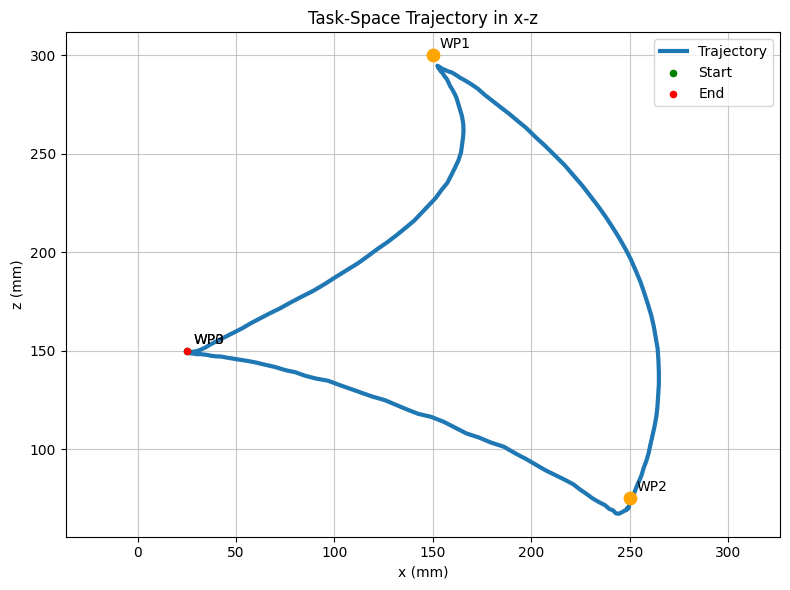

In [91]:
# --- Plot 3: Task-space trajectory (x-z) ---
plt.figure(figsize=(8, 6))
plt.plot(xyz_mm[:, 0], xyz_mm[:, 2], "-", linewidth=3, markersize=8, label="Trajectory")
plt.ylim(-1000, 1000)

w_xyz = []
for w in waypoints_jointspace:
    T = robot.get_fk(np.deg2rad(w))
    w_xyz.append([T[0, 3], T[1, 3], T[2, 3]])
w_xyz = np.array(w_xyz)

# Mark each waypoint clearly
for i, (x, z) in enumerate(zip(w_xyz[:, 0], w_xyz[:, 2])):
    if i == 0:
        plt.scatter(x, z, c="green", s=20, label="Start", zorder=5)
    elif i == len(w_xyz) - 1:
        plt.scatter(x, z, c="red", s=20, label="End", zorder=5)
    else:
        plt.scatter(x, z, c="orange", s=80, zorder=5)
    plt.annotate(
        f"WP{i}", (x, z), xytext=(5, 5), textcoords="offset points", fontsize=10
    )

plt.xlabel("x (mm)")
plt.ylabel("z (mm)")
plt.grid(True, alpha=0.7)
plt.legend()
plt.axis("equal")
plt.title("Task-Space Trajectory in x-z")
plt.tight_layout()

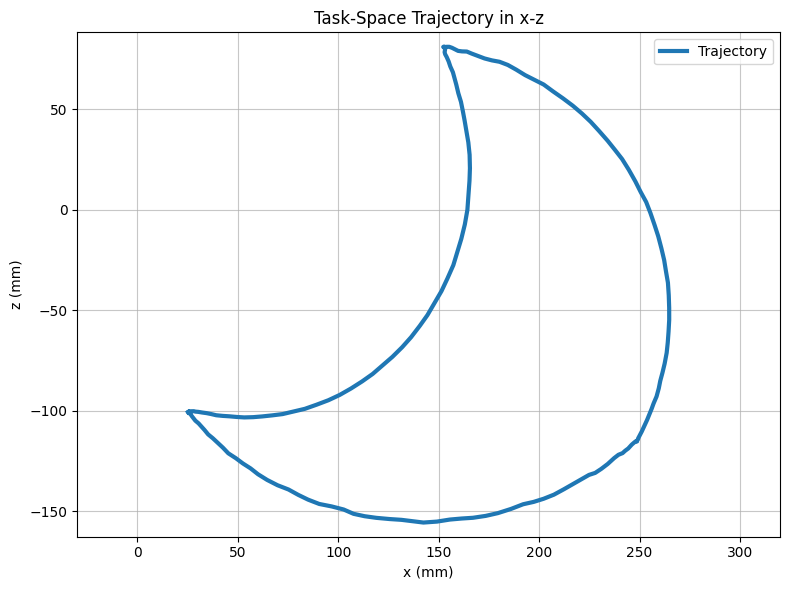

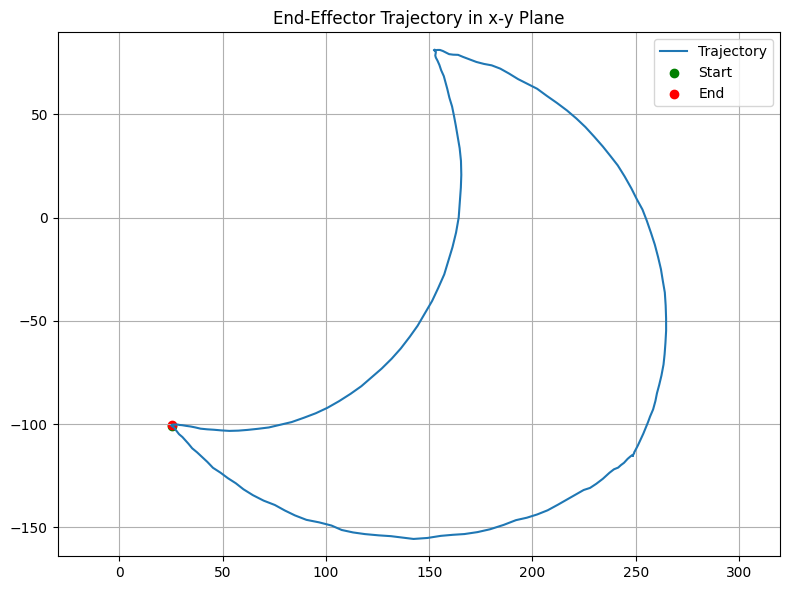

In [92]:
# plt.plot(xyz_mm[:, 0], xyz_mm[:, 1], "-", label="")
# # plt.plot(
# #     w_xyz[:, 0],
# #     w_xyz[:, 1],
# #     "o",
# #     markersize=10,
# #     color="orange",
# #     label="Waypoints",
# #     zorder=5,
# # )
# # for i, (xw, yw) in enumerate(zip(w_xyz[:, 0], w_xyz[:, 1]), start=1):
# #     plt.text(xw, yw, f" {i}", fontsize=12, fontweight="bold")
# plt.xlabel("x (mm)")
# plt.ylabel("y (mm)")
# plt.gca().set_aspect("equal", adjustable="box")
# plt.grid(True)
# plt.legend()
# plt.title("Task-Space Trajectory in x-y")
# plt.tight_layout()

# --- Plot 4: Task-space trajectory (x-y) ---
plt.figure(figsize=(8, 6))
plt.plot(xyz_mm[:, 0], xyz_mm[:, 1], "-", linewidth=3, markersize=8, label="Trajectory")

# # Mark each waypoint clearly
# for i, (x, z) in enumerate(zip(w_xyz[:, 0], w_xyz[:, 2])):
#     if i == 0:
#         plt.scatter(x, z, c="green", s=100, label="Start", zorder=5)
#     elif i == len(w_xyz) - 1:
#         plt.scatter(x, z, c="red", s=100, label="End", zorder=5)
#     else:
#         plt.scatter(x, z, c="orange", s=80, zorder=5)
#     plt.annotate(
#         f"WP{i}", (x, z), xytext=(5, 5), textcoords="offset points", fontsize=10
#     )

plt.xlabel("x (mm)")
plt.ylabel("z (mm)")
plt.grid(True, alpha=0.7)
plt.legend()
plt.axis("equal")
plt.title("Task-Space Trajectory in x-z")
plt.tight_layout()

plt.figure(figsize=(8, 6))
plt.plot(xyz_mm[:, 0], xyz_mm[:, 1], "-", label="Trajectory")
plt.scatter(xyz_mm[0, 0], xyz_mm[0, 1], c="g", label="Start")
plt.scatter(xyz_mm[-1, 0], xyz_mm[-1, 1], c="r", label="End")

plt.title("End-Effector Trajectory in x-y Plane")
plt.grid(True)
plt.legend()
plt.axis("equal")
plt.tight_layout()


In [93]:


# --- Plot 4: Task-space trajectory (x-y) ---
plt.figure(figsize=(8, 6))
plt.plot(xyz_data[:, 0], xyz_data[:, 1], "o-", linewidth=3, markersize=8, label="Path")

# Mark each waypoint clearly
for i, (x, y) in enumerate(zip(xyz_data[:, 0], xyz_data[:, 1])):
    if i == 0:
        plt.scatter(x, y, c="green", s=100, label="Start", zorder=5)
    elif i == len(xyz_data) - 1:
        plt.scatter(x, y, c="red", s=100, label="End", zorder=5)
    else:
        plt.scatter(x, y, c="orange", s=80, zorder=5)
    plt.annotate(
        f"WP{i}", (x, y), xytext=(5, 5), textcoords="offset points", fontsize=10
    )

plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.title("End-Effector Trajectory in x-y Plane (Waypoint-based)")
plt.grid(True, alpha=0.7)
plt.legend()
plt.axis("equal")
plt.tight_layout()

NameError: name 'xyz_data' is not defined

<Figure size 800x600 with 0 Axes>